In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [28]:
mypath = '/home/jovyan/work/data/mhar/'
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
gpu = [mypath + f for f in files if 'txt' in f]

In [3]:
gpu = [pd.read_csv(f) for f in gpu]
gpu = pd.concat(gpu, ignore_index=True)
gpu.columns = map(str.lower, gpu.columns)
gpu['total_points'] = gpu['iter'] * gpu['pad'] 
gpu['alg'] = 'mhar'
gpu_dim = gpu['dim'].unique()
gpu.drop_duplicates(inplace=True)
gpu['optimal'] = -1
gpu.head()

,time,type,dim,pad,iter,save,path,total_points,alg,optimal
0,1.435427,1,5,2048,64,0,output/sample_1_5_2048_64.txt,131072,mhar,-1
1,1.594598,1,5,8192,64,0,output/sample_1_5_8192_64.txt,524288,mhar,-1
2,2.395329,1,5,32768,64,0,output/sample_1_5_32768_64.txt,2097152,mhar,-1
3,5.477181,1,5,131072,64,0,output/sample_1_5_131072_64.txt,8388608,mhar,-1
4,17.798000,1,5,524288,64,0,output/sample_1_5_524288_64.txt,33554432,mhar,-1


In [4]:
gpu['pps'] = gpu['total_points'] / gpu['time']
gpu.sort_values(['type', 'dim', 'total_points','pps'], inplace=True)
gpu.reset_index(inplace=True)
del gpu['index']

In [5]:
# Optimal padding
gpu_ = gpu[['type', 'dim', 'pps']]
gpu_optimal = gpu_.loc[gpu_.groupby(['type', 'dim'])['pps'].idxmax()]
gpu_optimal = gpu.loc[gpu_optimal.index.values]
gpu.loc[gpu_optimal.index.values, ['optimal']] = 1
gpu_optimal.head(60)

,time,type,dim,pad,iter,save,path,total_points,alg,optimal,pps
41,225.264910,1,5,8388608,64,0,output/sample_1_5_8388608_64.txt,536870912,mhar,-1,2.383287e+06
66,1198.648364,1,10,2097152,729,0,output/sample_1_10_2097152_729.txt,1528823808,mhar,-1,1.275456e+06
89,413.847111,1,15,131072,2744,0,output/sample_1_15_131072_2744.txt,359661568,mhar,-1,8.690687e+05
114,345.670162,1,20,32768,6859,0,output/sample_1_20_32768_6859.txt,224755712,mhar,-1,6.502028e+05
130,847.278516,1,25,32768,13824,0,output/sample_1_25_32768_13824.txt,452984832,mhar,-1,5.346351e+05
143,229.962238,1,30,4096,24389,0,output/sample_1_30_4096_24389.txt,99897344,mhar,-1,4.344076e+05
153,438.930444,1,35,4096,39304,0,output/sample_1_35_4096_39304.txt,160989184,mhar,-1,3.667761e+05
166,731.023995,1,40,4096,59319,0,output/sample_1_40_4096_59319.txt,242970624,mhar,-1,3.323702e+05
176,1181.869733,1,45,4096,85184,0,output/sample_1_45_4096_85184.txt,348913664,mhar,-1,2.952218e+05
189,1777.325343,1,50,4096,117649,0,output/sample_1_50_4096_117649.txt,481890304,mhar,-1,2.711323e+05


In [6]:
# Second tier optimal padding
gpu_ = gpu[['type', 'dim', 'pps']].drop(gpu_optimal.index.values, axis=0)
gpu_optimal_2 = gpu_.loc[gpu_.groupby(['type', 'dim'])['pps'].idxmax()]
gpu_optimal_2 = gpu.loc[gpu_optimal_2.index.values]
gpu_optimal_2.head()

,time,type,dim,pad,iter,save,path,total_points,alg,optimal,pps
40,58.717689,1,5,2097152,64,0,output/sample_1_5_2097152_64.txt,134217728,mhar,-1,2.285814e+06
65,302.336623,1,10,524288,729,0,output/sample_1_10_524288_729.txt,382205952,mhar,-1,1.264174e+06
91,1686.568422,1,15,524288,2744,0,output/sample_1_15_524288_2744.txt,1438646272,mhar,-1,8.530020e+05
112,87.667813,1,20,8192,6859,0,output/sample_1_20_8192_6859.txt,56188928,mhar,-1,6.409300e+05
129,224.492287,1,25,8192,13824,0,output/sample_1_25_8192_13824.txt,113246208,mhar,-1,5.044548e+05


In [7]:
gpu['mc'] = 0
gpu.loc[gpu['type'] == 1, ['mc']] = gpu.loc[gpu['type'] == 1]['dim'].apply(lambda x: x*2)
gpu.loc[gpu['type'] == 2, ['mc']] = gpu.loc[gpu['type'] == 2]['dim'].apply(lambda x: x+1)
gpu['mc'] = gpu['mc'] * gpu['pad']
#gpu['mc'] = gpu['mc'] * gpu['pad']
gpu['mcps'] = gpu['mc'] /gpu['time']
gpu

,time,type,dim,pad,iter,save,path,total_points,alg,optimal,pps,mc,mcps
0,1.686933,1,5,1,64,0,output/sample_1_5_1_64.txt,64,mhar,-1,37.938673,10,5.927918
1,1.359522,1,5,1,64,0,output/sample_1_5_1_64.txt,64,mhar,-1,47.075369,10,7.355526
2,1.345768,1,5,1,64,0,output/sample_1_5_1_64.txt,64,mhar,-1,47.556488,10,7.430701
3,1.352572,1,5,2,64,0,output/sample_1_5_2_64.txt,128,mhar,-1,94.634519,20,14.786644
4,1.358623,1,5,4,64,0,output/sample_1_5_4_64.txt,256,mhar,-1,188.426076,40,29.441574
...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,163.961887,2,900,128,20000,0,output/sample_2_900_128_20000.txt,2560000,mhar,-1,15613.384591,115328,703.382976
568,591.691814,2,900,512,20000,0,output/sample_2_900_512_20000.txt,10240000,mhar,1,17306.306692,461312,779.649116
569,79.560949,2,1000,32,20000,0,output/sample_2_1000_32_20000.txt,640000,mhar,-1,8044.147387,32032,402.609577
570,185.750829,2,1000,128,20000,0,output/sample_2_1000_128_20000.txt,2560000,mhar,-1,13781.903498,128128,689.784270


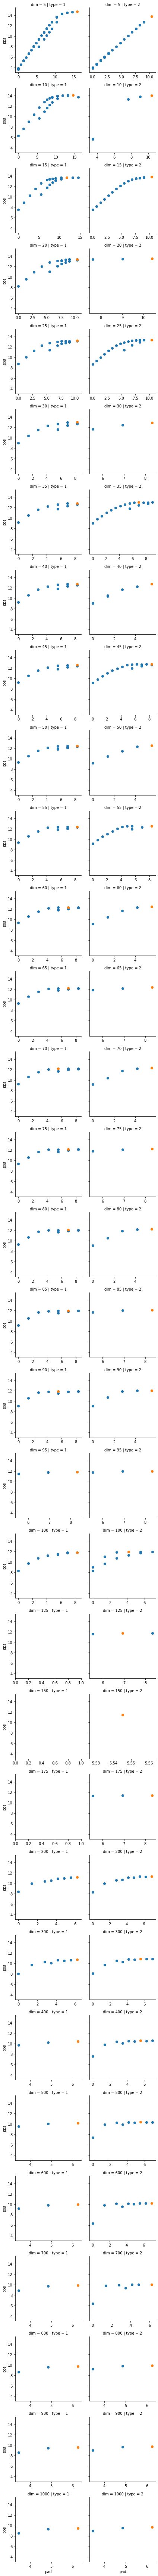

In [8]:
gpu_log = gpu.copy()
gpu_log[['pad', 'pps', 'mcps']] = np.log(gpu_log[['pad', 'pps', 'mcps']]) 
g = sns.FacetGrid(gpu_log, col='type', row='dim', sharex=False, hue='optimal')
g = g.map(plt.scatter, "pad", "pps")

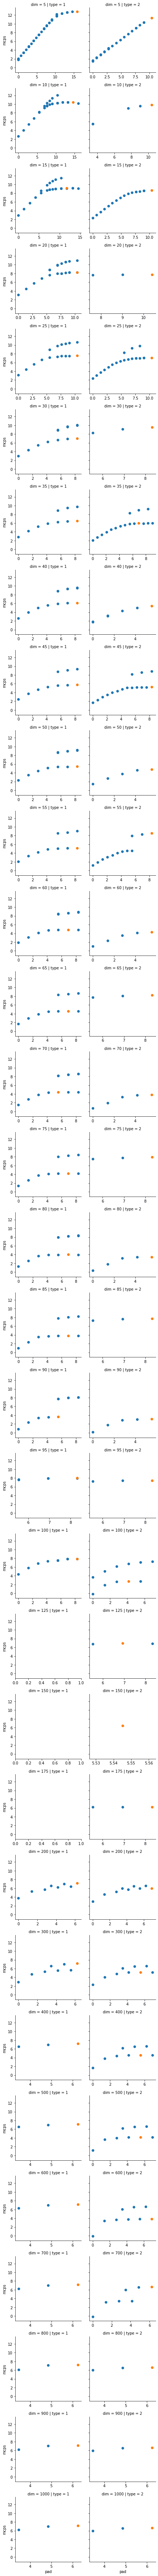

In [9]:
g = sns.FacetGrid(gpu_log, col='type', row='dim', sharex=False, hue='optimal')
g = g.map(plt.scatter, "pad", "mcps")

In [10]:
har = [mypath + f for f in files if 'csv' in f]
har = [pd.read_csv(f) for f in har]
har = pd.concat(har, ignore_index=True)
har.drop_duplicates(inplace=True)
har.dropna(inplace=True)
har.reset_index(inplace=True)
del har['index']
har.columns = map(str.lower, har.columns)
har['total_points'] = har['iter']
har['pps'] = har['total_points'] / har['time']
har.sort_values(['type', 'dim', 'pps'], inplace=True)
har

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,dim,iter,samples,thinning,time,type,total_points,pps
89,5,64,4,16.0,0.000306,1,64,2.088992e+05
19,5,512,32,16.0,0.000302,1,512,1.697616e+06
122,5,2048,32,64.0,0.001108,1,2048,1.848093e+06
47,5,8192,128,64.0,0.003998,1,8192,2.049003e+06
88,10,324,4,81.0,0.017560,1,324,1.845102e+04
...,...,...,...,...,...,...,...,...
56,175,90828,3,30276.0,5797.558324,2,90828,1.566660e+01
48,200,100,1,100.0,11062.727019,2,100,9.039363e-03
102,200,10000,2,5000.0,10245.211122,2,10000,9.760658e-01
55,200,118803,3,39601.0,10360.034897,2,118803,1.146743e+01


In [11]:
# Optimal har
har['optimal'] = -1
har_ = har[['type', 'dim', 'pps']]
har_optimal = har_.loc[har_.groupby(['type', 'dim'])['pps'].idxmax()]
har_optimal = har.loc[har_optimal.index.values]
har.loc[har_optimal.index.values, ['optimal']] = 1
har_optimal.head(60)

,dim,iter,samples,thinning,time,type,total_points,pps,optimal
47,5,8192,128,64.0,0.003998,1,8192,2.049003e+06,-1
18,10,2592,32,81.0,0.002931,1,2592,8.844481e+05,-1
45,15,351232,128,2744.0,0.536214,1,351232,6.550222e+05,-1
44,20,877952,128,6859.0,2.133742,1,877952,4.114612e+05,-1
43,25,1769472,128,13824.0,5.312937,1,1769472,3.330497e+05,-1
117,30,780448,32,24389.0,3.054780,1,780448,2.554842e+05,-1
41,35,5030912,128,39304.0,25.235796,1,5030912,1.993562e+05,-1
40,40,7592832,128,59319.0,50.838456,1,7592832,1.493521e+05,-1
39,45,10903552,128,85184.0,85.660211,1,10903552,1.272884e+05,-1
38,50,15059072,128,117649.0,138.881838,1,15059072,1.084308e+05,-1


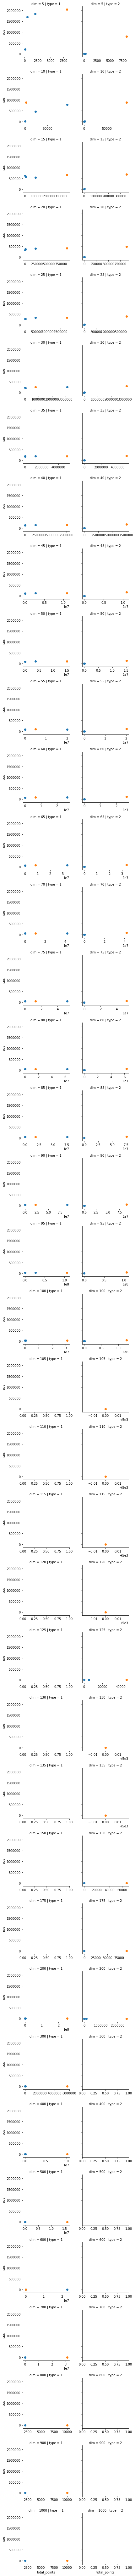

In [12]:
g = sns.FacetGrid(har, col='type', row='dim', sharex=False, hue='optimal')
g = g.map(plt.scatter, "total_points", "pps")

In [13]:
gpu['alg'] = 'mhar'
har['alg'] = 'har'
# Time comparison
df_time = pd.concat([har[['alg','type', 'dim', 'pps', 'optimal']], gpu[['alg','type', 'dim', 'pps', 'optimal']]])
df_time.head()

,alg,type,dim,pps,optimal
89,har,1,5,2.088992e+05,-1
19,har,1,5,1.697616e+06,-1
122,har,1,5,1.848093e+06,-1
47,har,1,5,2.049003e+06,1
88,har,1,10,1.845102e+04,-1


In [14]:
df_time.describe()

,type,dim,pps,optimal
count,774.000000,774.000000,7.740000e+02,774.000000
mean,1.427649,123.740310,1.881749e+05,-0.689922
std,0.495057,200.170357,2.978315e+05,0.724351
min,1.000000,5.000000,9.039363e-03,-1.000000
25%,1.000000,25.000000,1.274041e+04,-1.000000
50%,1.000000,55.000000,9.115208e+04,-1.000000
75%,2.000000,95.000000,2.139937e+05,-1.000000
max,2.000000,1000.000000,2.383287e+06,1.000000


In [15]:
df_time.loc[df_time['type']==1].sort_values('dim', ascending=False)

,alg,type,dim,pps,optimal
333,mhar,1,1000,12775.110779,1
331,mhar,1,1000,5099.660148,-1
61,har,1,1000,359.351670,-1
158,har,1,1000,389.220480,1
332,mhar,1,1000,11109.847270,-1
...,...,...,...,...,...
20,mhar,1,5,12084.556491,-1
19,mhar,1,5,12046.093365,-1
18,mhar,1,5,12035.421633,-1
17,mhar,1,5,12028.882828,-1


In [16]:
df_time_opt = df_time.loc[df_time['optimal'] == 1]

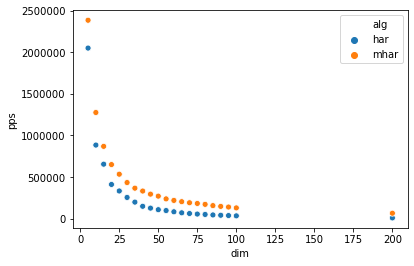

In [17]:
sns.scatterplot(x="dim", y="pps", data=df_time_opt.loc[(df_time_opt['dim']<=200) & (df_time_opt['type']==1)], hue='alg')

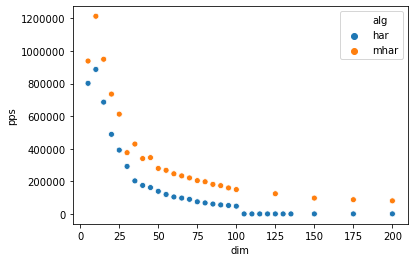

In [18]:
sns.scatterplot(x="dim", y="pps", data=df_time_opt.loc[(df_time_opt['dim']<=200) & (df_time_opt['type']==2)], hue='alg')

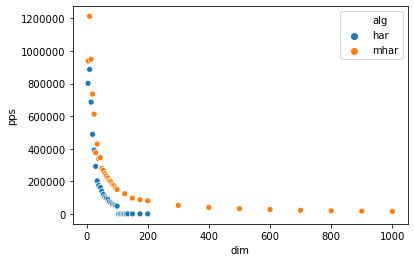

In [19]:
sns.scatterplot(x="dim", y="pps", data=df_time_opt.loc[(df_time_opt['type']==2)], hue='alg')

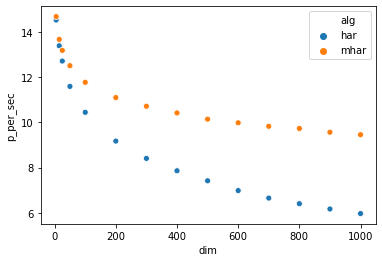

In [32]:
df_time_opt_ = df_time_opt.copy()
df_time_opt_['p_per_sec'] = np.log(df_time_opt_['pps'])
r_dim = [5, 15, 25, 50, 100, 125, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
df_time_opt_ = df_time_opt_.loc[df_time_opt_['dim'].isin(r_dim)]
sns.scatterplot(x="dim", y="p_per_sec", data=df_time_opt_.loc[(df_time_opt_['type']==1)], hue='alg')

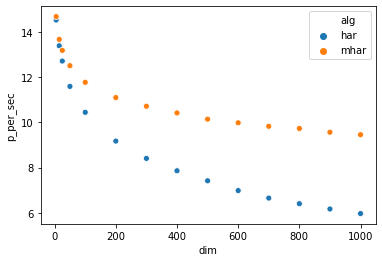

In [34]:
# Save  graph
g = sns.scatterplot(x="dim", y="p_per_sec", data=df_time_opt_.loc[(df_time_opt_['type']==1)], hue='alg')
fig = g.get_figure()
fig.savefig("/home/jovyan/work/data/mhar_graphs/p_per_sec_hyper.png")

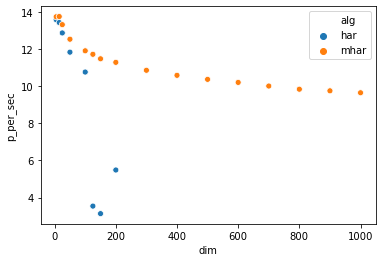

In [31]:
df_time_opt_ = df_time_opt.copy()
df_time_opt_['p_per_sec'] = np.log(df_time_opt_['pps'])
r_dim = [5, 15, 25, 50, 100, 125, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
df_time_opt_ = df_time_opt_.loc[df_time_opt_['dim'].isin(r_dim)]
sns.scatterplot(x="dim", y="p_per_sec", data=df_time_opt_.loc[(df_time_opt_['type']==2)], hue='alg')

In [26]:
df_comp = df_time_opt.pivot_table(index=['type', 'dim'], columns='alg', values='pps').reset_index()
df_comp['speed_up'] = df_comp['mhar'] / df_comp['har']
df_comp.head(60)

alg,type,dim,har,mhar,speed_up
0,1,5,2.049003e+06,2.383287e+06,1.163144
1,1,10,8.844481e+05,1.275456e+06,1.442093
2,1,15,6.550222e+05,8.690687e+05,1.326777
3,1,20,4.114612e+05,6.502028e+05,1.580229
4,1,25,3.330497e+05,5.346351e+05,1.605271
5,1,30,2.554842e+05,4.344076e+05,1.700331
6,1,35,1.993562e+05,3.667761e+05,1.839803
7,1,40,1.493521e+05,3.323702e+05,2.225413
8,1,45,1.272884e+05,2.952218e+05,2.319314
9,1,50,1.084308e+05,2.711323e+05,2.500509


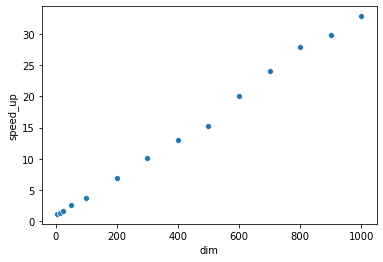

In [37]:
df_comp_log = df_comp.copy()
#df_comp_log[['speed_up']] = np.log(df_comp_log[['speed_up']])
r_dim = [5, 15, 25, 50, 100, 125, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
df_comp_log = df_comp_log.loc[df_comp_log['dim'].isin(r_dim)]
sns.scatterplot(x="dim", y="speed_up", data=df_comp_log.loc[(df_comp_log['type']==1)])

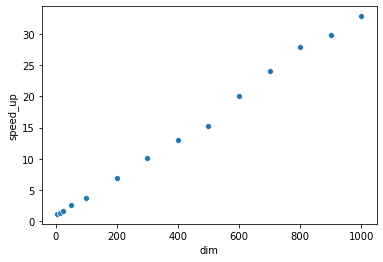

In [38]:
# Save  graph
g = sns.scatterplot(x="dim", y="speed_up", data=df_comp_log.loc[(df_comp_log['type']==1)])
fig = g.get_figure()
fig.savefig("/home/jovyan/work/data/mhar_graphs/spd_hyper.png")

In [ ]:
df_time_opt_ = df_time_opt.copy()
df_time_opt_['p_per_sec'] = np.log(df_time_opt_['pps'])
r_dim = [5, 15, 25, 50, 100, 125, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
df_time_opt_ = df_time_opt_.loc[df_time_opt_['dim'].isin(r_dim)]
sns.scatterplot(x="dim", y="p_per_sec", data=df_time_opt_.loc[(df_time_opt_['type']==1)], hue='alg')